<h2> Import Libraries </h2>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<h2> Read Image </h2>

In [18]:
image = mpimg.imread('test.jpg')

<h2> Size_Of_Image </h2>

In [19]:
# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.

X_size = image.shape[1]
Y_size = image.shape[0]
color_select = np.copy(image)
line_image = np.copy(image)

<h2> Defining Color Criteria </h2>

In [20]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold , green_threshold , blue_threshold]

<h2> Defining Triangle </h2>

In [21]:
# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing

left_bottom = [0 , 539]
right_bottom = [900 , 539]
apex = [475 , 320]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

<h2> Mask Pixels </h2>

In [22]:
color_thresholds = (image[:,:,0]<rgb_threshold[0])| \
                   (image[:,:,1]<rgb_threshold[1])| \
                   (image[:,:,2]<rgb_threshold[2])

<h2> Region_inside_the_Lines </h2>

In [23]:
XX, YY = np.meshgrid(np.arange(0, X_size), np.arange(0, Y_size))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

<h2> Color Selection </h2>

In [24]:
# Mask color selection
color_select[color_thresholds] = [0,0,0]

# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

<h2> Output </h2>

In [32]:
# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)

# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)

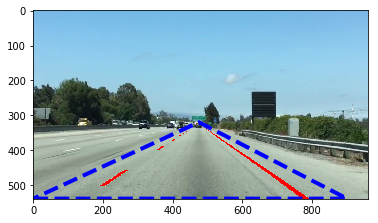

In [33]:
plt.show()